## 下载2013年M25道路数据

In [1]:
from bs4 import BeautifulSoup
import requests
from time import localtime, strftime

soup = BeautifulSoup(open('he_2013_M25.html'), 'lxml')
url = 'http://tris.highwaysengland.co.uk'

In [2]:
soup.find_all('td')[0].a['href']

'/download/810c7a6e-0319-412d-99a2-66cf8ed6978b'

In [3]:
td_tag_list = soup.find_all('td')
num = 0
dic = {'link':[], 'filename':[]}
for td in td_tag_list:
    if num%3 == 0:
        dic['link'].append(td.a['href'])
        dic['filename'].append(td.string)
    num = num + 1

In [4]:
def save_file(filename, url):
    path = 'data/' + filename
    with open(path, 'wb') as f:
        f.write(requests.get('http://tris.highwaysengland.co.uk' + url).content)

In [5]:
links = dic['link']
filenames = dic['filename']

In [6]:
for i, filename in enumerate(filenames):
    print strftime('%H:%M:%S', localtime()) + ' download ' + filename
    save_file(filename, links[i])

19:13:24 download 2013-01 LM1072.zip
19:13:27 download 2013-01 LM1073.zip
19:13:28 download 2013-01 LM297.zip
19:13:31 download 2013-01 LM298.zip
19:13:34 download 2013-01 LM299.zip
19:13:35 download 2013-01 LM300.zip
19:13:37 download 2013-01 LM301.zip
19:13:39 download 2013-01 LM302.zip
19:13:41 download 2013-01 LM303.zip
19:13:42 download 2013-01 LM304.zip
19:13:44 download 2013-01 LM305.zip
19:13:45 download 2013-01 LM306.zip
19:13:48 download 2013-01 LM307.zip
19:13:49 download 2013-01 LM308.zip
19:13:50 download 2013-01 LM309.zip
19:13:52 download 2013-01 LM310.zip
19:13:54 download 2013-01 LM311.zip
19:13:55 download 2013-01 LM312.zip
19:13:57 download 2013-01 LM313.zip
19:13:59 download 2013-01 LM314.zip
19:14:00 download 2013-01 LM315.zip
19:14:01 download 2013-01 LM317.zip
19:14:03 download 2013-01 LM319A.zip
19:14:04 download 2013-01 LM320A.zip
19:14:05 download 2013-01 LM322.zip
19:14:08 download 2013-01 LM323.zip
19:14:09 download 2013-01 LM324.zip
19:14:11 download 2013-0

In [ ]:
import zipfile
import os
def un_zip(file_name):
    """unzip zip file"""
    zip_file = zipfile.ZipFile(file_name)
    if os.path.isdir(file_name + "_files"):
        pass
    else:
        os.mkdir(file_name + "_files")
    for names in zip_file.namelist():
        zip_file.extract(names,file_name + "_files/")
    zip_file.close()

In [25]:
import zipfile
import os
def my_un_zip(file_path):
    zip_file = zipfile.ZipFile(file_path)
    name = zip_file.namelist()[0]
    zip_file.extract(name, 'data/csv')
    zip_file.close()

In [34]:
# 开始解压
for parent, _, file_names in os.walk('./data/zip'):
    for file_name in file_names:
        current_path = os.path.join(parent, file_name)
        my_un_zip(current_path)

In [83]:
# 读取csv
import pandas as pd
df = pd.DataFrame(columns=[u'Local Date', u' Local Time', u' Day Type ID', u' HATRIS Link Number',
                           u' Road', u' Carriageway', u' HATRIS Link Description', u' Link Length',
                           u' Total Traffic Flow', u' Travel Time', u' Fused Average Speed',
                           u' Quality Index'])
for parent, _, file_names in os.walk('./data/csv'):
    for file_name in file_names:
        current_path = os.path.join(parent, file_name)
        df_new = pd.read_csv(current_path)
        df = pd.concat([df, df_new], axis=0, ignore_index=True)

In [84]:
df.rename(columns=lambda x:x.strip().replace(' ','_'), inplace=True)
df.to_csv('./data/HE_2013_M25.csv', header=True, index=None, sep=';', mode='w')

In [1]:
# df1 = pd.read_csv('./data/HE_2013_M25.csv', delimiter=';', parse_dates=['Local_Date', 'Local_Time'])
import pandas as pd
df = pd.read_csv('./data/HE_2013_M25.csv', delimiter=';')
df.head()

Local_Date Local_Time  Day_Type_ID HATRIS_Link_Number Road  \
0  01/12/2013   00:00:00          6.0              LM329  M25   
1  01/12/2013   00:15:00          6.0              LM329  M25   
2  01/12/2013   00:30:00          6.0              LM329  M25   
3  01/12/2013   00:45:00          6.0              LM329  M25   
4  01/12/2013   01:00:00          6.0              LM329  M25   

                 Carriageway                  HATRIS_Link_Description  \
0  Motorway dual carriageway  M25 between M25 J22 and M25 J23 (LM329)   
1  Motorway dual carriageway  M25 between M25 J22 and M25 J23 (LM329)   
2  Motorway dual carriageway  M25 between M25 J22 and M25 J23 (LM329)   
3  Motorway dual carriageway  M25 between M25 J22 and M25 J23 (LM329)   
4  Motorway dual carriageway  M25 between M25 J22 and M25 J23 (LM329)   

   Link_Length  Total_Traffic_Flow  Travel_Time  Fused_Average_Speed  \
0  5260.000229               237.0       178.74               105.94   
1  5260.000229               179.0       179.86               105.28   
2  5260.000229               185.0       180.26               105.05   
3  5260.000229               159.0       178.73               105.95   
4  5260.000229               153.0       178.20               106.26   

   Quality_Index  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0

In [64]:
print df['Day_Type_ID'].unique()  # [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14]
print df['Road'].unique()  # M25路段
print df['Carriageway'].unique()  # 双车道
print df['HATRIS_Link_Description'].unique()[:5]  # 子链路描述
print df['Quality_Index'].unique()  # [1, 2, 3]

[  6.   0.   1.   2.   3.   4.   5.   7.  11.  14.  12.  13.   9.]
['M25']
['Motorway dual carriageway']
['M25 between M25 J22 and M25 J23 (LM329)'
 'M25 between M25 J10 and M25 J11 (LM299)'
 'M25 between M25 J1A and M25 J1B (LM1073)'
 'M25 between M25 J15 and M25 J14 (LM308)'
 'M25 between M25 J11 and M25 J12 (LM301)']
[ 1.  3.  2.]


In [2]:
df = df.drop(['Road', 'Carriageway', 'HATRIS_Link_Description'], axis=1)  # 删除部分字段

In [3]:
# 日期转成转成datetime64[ns]
df['date_time'] = df['Local_Date'] + '-' + df['Local_Time']
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y-%H:%M:%S')
df['date_time'] = df['date_time'].map(dateparse)
df = df.drop(['Local_Date', 'Local_Time'], axis=1)

In [4]:
df = df.sort_values(by=['HATRIS_Link_Number', 'date_time']).reset_index(drop=True)

In [5]:
df.head()

Day_Type_ID HATRIS_Link_Number  Link_Length  Total_Traffic_Flow  \
0         14.0             LM1072  1929.999948                12.0   
1         14.0             LM1072  1929.999948                26.0   
2         14.0             LM1072  1929.999948                37.0   
3         14.0             LM1072  1929.999948                26.0   
4         14.0             LM1072  1929.999948                38.0   

   Travel_Time  Fused_Average_Speed  Quality_Index           date_time  
0        77.98                89.10            1.0 2013-01-01 00:00:00  
1        79.85                87.01            1.0 2013-01-01 00:15:00  
2        77.82                89.28            1.0 2013-01-01 00:30:00  
3        78.40                88.62            1.0 2013-01-01 00:45:00  
4        76.26                91.11            1.0 2013-01-01 01:00:00

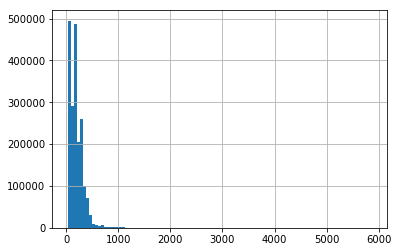

In [84]:
import matplotlib.pyplot as plt
import numpy as np
df['Travel_Time'].hist(bins=100)
plt.show()

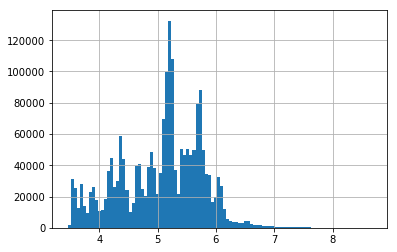

In [85]:
df['Travel_Time_Log'] = np.log1p(df['Travel_Time'])  # log(1+x)
df['Travel_Time_Log'].hist(bins=100)
plt.show()

## 查看数据缺失情况
### 各链路数据缺失情况
- 每条链路应有数据量：365*24*4 = 35040
- 剔除NAN值大于20,000的链路

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyecharts import HeatMap
df = pd.read_csv('./data/HE_2013_M25.csv', delimiter=';')
df = df.drop(['Road', 'Carriageway', 'HATRIS_Link_Description'], axis=1)  # 删除部分字段
# 日期转成转成datetime64[ns]
df['date_time'] = df['Local_Date'] + '-' + df['Local_Time']
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y-%H:%M:%S')
df['date_time'] = df['date_time'].map(dateparse)
df['Travel_Time_Log'] = np.log1p(df['Travel_Time'])
# df = df.drop(['Local_Date', 'Local_Time'], axis=1)

In [2]:
date_range = pd.date_range('2013-01-01 00:00:00', '2013-12-31 23:45:00', freq='15min')
link_list = df['HATRIS_Link_Number'].unique()

new_index = pd.MultiIndex.from_product([link_list, date_range], names=['HATRIS_Link_Number', 'date_time'])
df_new_index = pd.DataFrame(index=new_index).reset_index()
# print df_new_index.count()
# 缺失数据填充为NaN
df_fillna = pd.merge(df_new_index, df, on=['HATRIS_Link_Number', 'date_time'], how='left')
print df_fillna.count()

HATRIS_Link_Number     2347680
date_time              2347680
Local_Date             1983914
Local_Time             1983914
Day_Type_ID            1983914
Link_Length            1983914
Total_Traffic_Flow     1983912
Travel_Time            1983914
Fused_Average_Speed    1983914
Quality_Index          1983914
Travel_Time_Log        1983914
dtype: int64


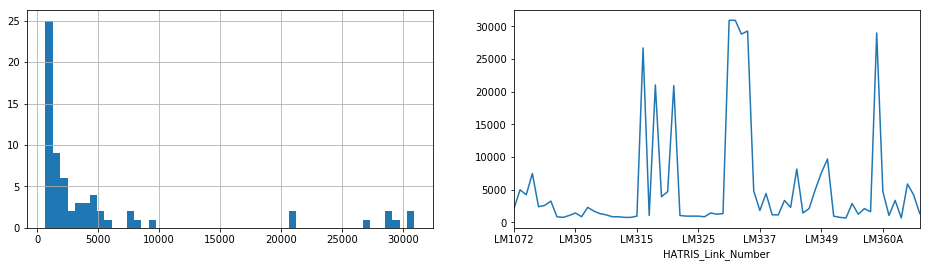

In [3]:
# 链路缺失值统计
nan_count = df_fillna.loc[df_fillna['Travel_Time'].isnull() == True].groupby('HATRIS_Link_Number')['date_time'].count()
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
nan_count.hist(bins=50)
ax2 = fig.add_subplot(122)
nan_count.plot()
plt.show()

In [4]:
nan_count.sort_values()[-15:]

HATRIS_Link_Number
LM346A     4993
LM1073     4997
LM364      5882
LM298      7490
LM349      7590
LM343      8164
LM350      9704
LM321     20930
LM318     21026
LM316     26690
LM333     28803
LM359B    28988
LM334     29280
LM332     30913
LM331     30913
Name: date_time, dtype: int64

### 日历热力图可视化缺失数据
- 2013.11.14、2013.11.15缺失大量数据

In [5]:
df_fillna['Local_Date'] = df_fillna.date_time.map(lambda x: x.strftime('%Y-%m-%d'))  # 格式化Local_Date,用于groupby
# 每天缺失数据统计
nan_series = df_fillna.loc[df_fillna['Travel_Time'].isnull() == True].groupby('Local_Date')['date_time'].count()

In [6]:
from pyecharts import HeatMap

def draw_heatmap(series, name='热力图', min_max=None):
    '''
    绘制日历热力图
    series.index为连续日期
    series.values为每天的值
    '''
    date_index = pd.date_range('2013-01-01 00:00:00', '2013-12-31 23:45:00',
                               freq='D').map(lambda x: x.strftime('%Y-%m-%d'))
    # 可能存在
    series = series.reindex(index=date_index)
    data = zip(list(series.index), series.values)
    if min_max:
        min_ = min_max[0]
        max_ = min_max[1]
    else:
        min_ = int(series.min()) / 10 * 10
        max_ = (int(series.max())/10 + 1) * 10
    heatmap = HeatMap(name, '日历热力图', width=900)
    heatmap.add('', data, is_calendar_heatmap=True,
                visual_text_color='#000', visual_range_text=['', ''],
                visual_range=[min_, max_], calendar_cell_size=['auto', 20],
                is_visualmap=True, calendar_date_range='2013',
                visual_orient="horizontal", visual_pos="center",
                visual_top="60%", is_piecewise=True)
    return heatmap

In [7]:
print '09/05/2013数据缺失量应为', 24*4*67 - df[df.Local_Date == '09/05/2013'].count()[0]
draw_heatmap(nan_series, '数据缺失情况', min_max=[200, 6500])

09/05/2013数据缺失量应为 2988


In [8]:
links_59 = list(nan_count.sort_values()[:-8].index)  # 去掉八条缺失过多的链路
df_fillna_59links = df_fillna[df_fillna['HATRIS_Link_Number'].isin(links_59)]  # 去掉八条缺失过多链路后的数据

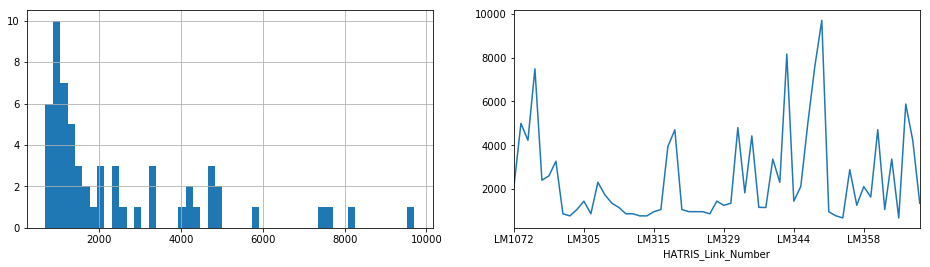

In [9]:
nan_count_59 = df_fillna_59links.loc[df_fillna_59links['Travel_Time']
                                     .isnull() == True].groupby('HATRIS_Link_Number')['date_time'].count()

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
nan_count_59.hist(bins=50)
ax2 = fig.add_subplot(122)
nan_count_59.plot()
plt.show()

In [10]:
data_series_59 = df_fillna_59links.loc[df_fillna_59links['Travel_Time']
                                       .isnull() == True].groupby('Local_Date')['date_time'].count()

In [11]:
print '2013-05-09数据缺失量应为', 24*4*59 - df_fillna_59links[df_fillna_59links.Local_Date == '2013-05-09'].count()[-1]
draw_heatmap(data_series_59, '59条链路的数据缺失情况', min_max=[0, 5500])

2013-05-09数据缺失量应为 2220


### 可视化每天平均旅行时间

In [12]:
# pandas中mean()自动忽略NaN值，numpy中不忽略
mean_travel_time = df_fillna_59links.groupby('Local_Date')['Travel_Time'].mean()
draw_heatmap(mean_travel_time, '每天平均旅行时间', min_max=[150 ,270])

In [13]:
mean_travel_time = df_fillna_59links.groupby('Local_Date')['Travel_Time_Log'].mean()
draw_heatmap(mean_travel_time, '每天平均旅行时间log', min_max=[4.7, 5.5])

### 可视化每天链路每天旅行时间

In [109]:
from pyecharts import Page
page = Page()
def show_link_heatmap(group):
    data = group.groupby('Local_Date')['Travel_Time'].mean()
    link_name = group.HATRIS_Link_Number.values[0]
    page.add(draw_heatmap(data, link_name))

df_fillna.groupby('HATRIS_Link_Number').apply(show_link_heatmap)
page

In [112]:
df_fillna_59links.loc[df_fillna_59links.date_time.dt.month.isin([1,2,3,4,5,6,7,8,9,10])].to_csv(
    './data/HE_2013_M25_59_1_10.csv', header=True, index=None, sep=';', mode='w')

### 可视化每条路的数据缺失情况

In [14]:
from pyecharts import Page
page = Page()
def show_link_heatmap(group):
    data = group.loc[group['Travel_Time'].isnull() == True].groupby('Local_Date')['date_time'].count()
    link_name = group.HATRIS_Link_Number.values[0]
    page.add(draw_heatmap(data, link_name))

df_fillna.groupby('HATRIS_Link_Number').apply(show_link_heatmap)
page